In [11]:
from qiskit import Aer, QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
import numpy as np
from qiskit.circuit.library import MCMT, XGate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Matplotlib

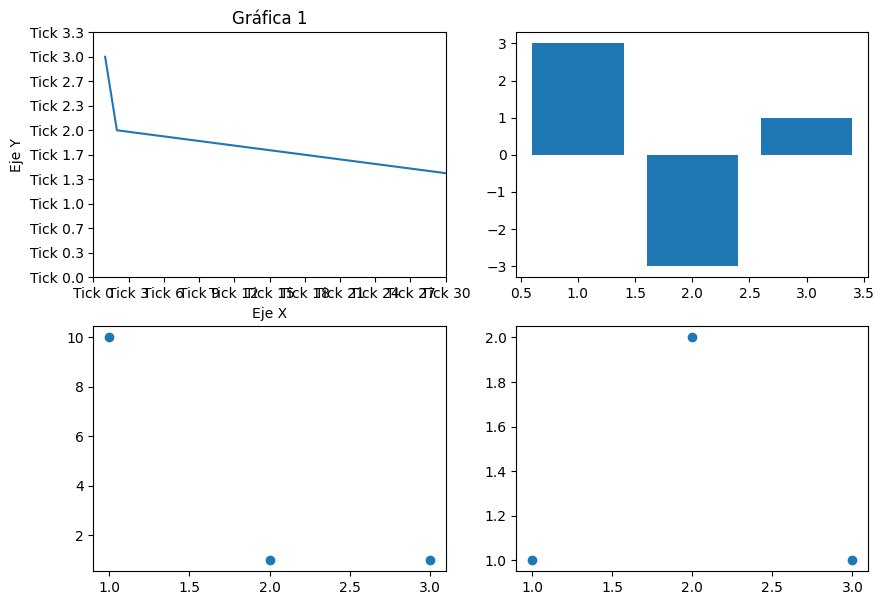

In [12]:
# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Dibujar puntos
axs[0, 0].set_xlim(0, 30)

axs[0, 0].set_xlim(0, 30)
axs[0, 0].set_ylim(0, 2)
axs[0, 0].set_xlabel("Eje X")
axs[0, 0].set_ylabel("Eje Y")
axs[0, 0].set_title("Gráfica 1")
axs[0, 0].set_xticks([i*3 for i in range(11)])
axs[0, 0].set_xticklabels(["Tick "+str(i*3) for i in range(11)])
axs[0, 0].set_yticks([i/3 for i in range(11)])
axs[0, 0].set_yticklabels(["Tick "+str(round(i/3, 1)) for i in range(11)])

axs[0, 0].plot([1, 2, 50], [3, 2, 1])
axs[0, 1].bar([1, 2, 3], [3, -3, 1])
axs[1, 0].scatter(x = [1, 2, 3], y = [10, 1, 1])
axs[1, 1].scatter(x = [1, 2, 3], y = [1, 2, 1])

# Guardar el gráfico en formato png
#fig.savefig('figura.png', facecolor=fig.get_facecolor(), edgecolor='none')

# Mostrar el gráfico
plt.show()

## Circuitos

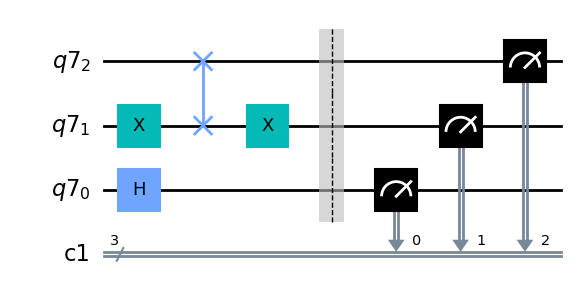

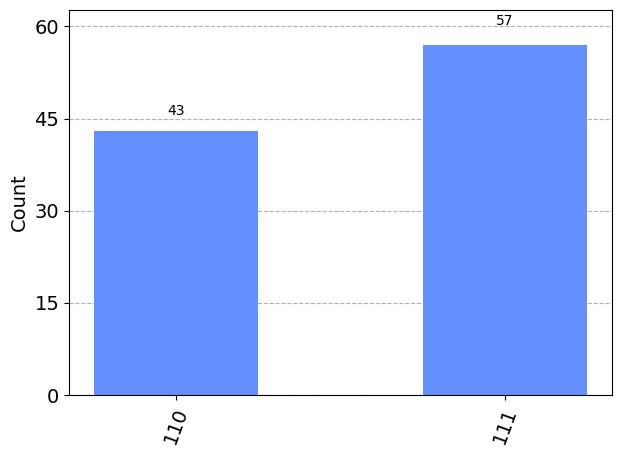

In [13]:
#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(circ)

#Mostramos los resultados
plot_histogram(counts)